In [1]:
# python notebook for Make Your Own Neural Network
# code for a 3-layer neural network, and code for learning the MNIST dataset
# (c) Tariq Rashid, 2016
# license is GPLv2

In [2]:
from rich import print

In [3]:
import imageio.v2 as imageio  # helper to load data from PNG image files
import glob                   # glob helps select multiple files using patterns

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### our own image test data set

In [5]:
our_own_dataset = []

for image_file_name in glob.glob('my_own_images/2828_my_own_?.png'):
    print(f"loading {image_file_name}")
    # use the filename to set the correct label
    label = int(image_file_name[-5:-4])
    # load image data from png files into an array
    img_array = imageio.imread(image_file_name, mode='F')
    # reshape from 28x28 to list of 784 values, invert values
    img_data  = 255.0 - img_array.reshape(784)
    # then scale data to range from 0.01 to 1.0
    img_data = (img_data / 255.0 * 0.99) + 0.01
    print(f'{img_data.min() = :f}')
    print(f'{img_data.max() = :f}')
    # append label and image data to test data set
    record = np.append(label,img_data)
    # print(f'{record = }')
    our_own_dataset.append(record)

loading my_own_images/2828_my_own_4.png

img_data.min() = 0.010000

img_data.max() = 0.930118

loading my_own_images/2828_my_own_5.png

img_data.min() = 0.010000

img_data.max() = 0.868000

loading my_own_images/2828_my_own_3.png

img_data.min() = 0.010000

img_data.max() = 1.000000

loading my_own_images/2828_my_own_2.png

img_data.min() = 0.010000

img_data.max() = 1.000000

loading my_own_images/2828_my_own_6.png

img_data.min() = 0.010000

img_data.max() = 1.000000

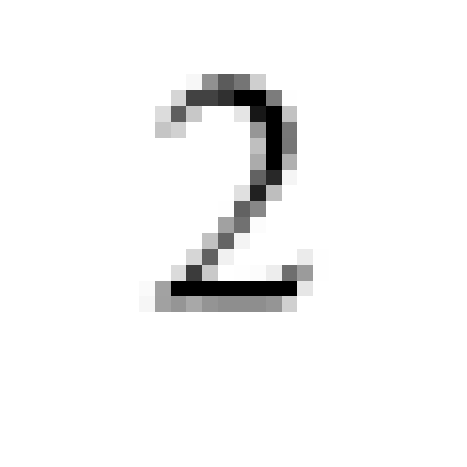

In [6]:
plt.imshow(our_own_dataset[3][1:].reshape(28, 28), cmap='Greys', interpolation='None')
plt.axis('off');

In [7]:
print(our_own_dataset[3])

[2.         0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.07211765 0.52247059
 0.71658826 0.61952943 0.29729411 0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.27400002 0.79423529 0.79423529 0.84470588 1.
 1.         0.59623533 0.01776471 0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.23905884 0.70494121
 0.32835296 0.01       0.01       0.18858825 0.92235297 1.
 0.35552943 0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.34388235 0.28952941 0.01       0.01
 0.01       0.01       0.50305885 1.         0.61176473 0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.37105882 1.         0.61564708 0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.43705884 1.
 0.42152941 0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.68941176 0.86800003 0.09152941 0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.21964706
 0.88741177 0.37494117 0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01388235 0.68941176 0.55741179 0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.46811765 0.63505882 0.02941176 0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       